In [175]:
#Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [176]:
# Target Search Accounts
target_accounts = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# List to hold results
results_list = []
avg_results_list = []

for y in target_accounts:

    counter = 0

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 101):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(y, page=x)

        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
        counter = counter + 1

        # Print Tweets
        print(f"News: {y}")
        print(f'Article {counter}: {tweet["text"]}')
        print("Date:", tweet["created_at"])
        print("Compound Score:", compound)
        print("Positive Score:", pos)
        print("Neutral Score:", neu)
        print("Negative Score: ", neg)

        # Store the Sentiments
        sentiment = {
        "News": y,
        "Article": tweet["text"],
        "Date": tweet["created_at"],
        "Compound": compound,
        "Positive": pos,
        "Neutral": neu,
        "Negative": neg,
        "Tweets Ago": counter
        }
         
        # Append news results to 'results_list'
        results_list.append(sentiment)
        
    # Store the Average Sentiments
    avg_sentiment = {
        "News": y,
        "Compound": np.mean(compound_list)
    }
        
    # Append news results to 'results_list'
    avg_results_list.append(avg_sentiment)

News: @BBCWorld
Article 1: Australian surf event cancelled after shark attacks https://t.co/cvkssQ0MFB
Date: Wed Apr 18 02:39:42 +0000 2018
Compound Score: -0.5994
Positive Score: 0.0
Neutral Score: 0.55
Negative Score:  0.45
News: @BBCWorld
Article 2: RT @BBCWorld: US plane makes emergency landing after engine explodes https://t.co/ieeOHhjhyb
Date: Tue Apr 17 19:34:03 +0000 2018
Compound Score: -0.3818
Positive Score: 0.0
Neutral Score: 0.794
Negative Score:  0.206
News: @BBCWorld
Article 3: R Kelly faces fresh sexual misconduct allegation https://t.co/DcUeFnXQGn
Date: Tue Apr 17 11:38:23 +0000 2018
Compound Score: 0.3182
Positive Score: 0.277
Neutral Score: 0.723
Negative Score:  0.0
News: @BBCWorld
Article 4: Baboons prop up barrels to escape Texas research centre https://t.co/mdSlR4bcXZ
Date: Tue Apr 17 08:51:14 +0000 2018
Compound Score: 0.1779
Positive Score: 0.159
Neutral Score: 0.841
Negative Score:  0.0
News: @BBCWorld
Article 5: Why has Saudi Arabia suddenly decided cinema is

News: @BBCWorld
Article 35: Rival rallies as Brazil awaits Lula jail ruling https://t.co/kNDokBwuwz
Date: Wed Apr 04 15:58:40 +0000 2018
Compound Score: 0.0772
Positive Score: 0.14
Neutral Score: 0.86
Negative Score:  0.0
News: @BBCWorld
Article 36: Florida shooting students: 'Clear bags don't make me feel secure' https://t.co/4nqrgGU6Ut
Date: Wed Apr 04 11:10:03 +0000 2018
Compound Score: 0.6124
Positive Score: 0.357
Neutral Score: 0.643
Negative Score:  0.0
News: @BBCWorld
Article 37: Winnie Mandela - the young mother who refused to be broken https://t.co/0gBx6QY3xx
Date: Wed Apr 04 00:06:07 +0000 2018
Compound Score: -0.6486
Positive Score: 0.0
Neutral Score: 0.629
Negative Score:  0.371
News: @BBCWorld
Article 38: Israel and Saudi Arabia: The relationship emerging into the open https://t.co/yMnLYtFTLV
Date: Tue Apr 03 16:54:08 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @BBCWorld
Article 39: India PM Narendra Modi overturns minis

News: @BBCWorld
Article 70: Tajikistan ministry's book tells women how to dress https://t.co/r9H0rDrmfs
Date: Wed Mar 21 14:35:22 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @BBCWorld
Article 71: Cambridge Analytica: Facebook data row academic 'is scapegoat' https://t.co/bo4lDPsuYb
Date: Wed Mar 21 06:15:48 +0000 2018
Compound Score: -0.4019
Positive Score: 0.0
Neutral Score: 0.748
Negative Score:  0.252
News: @BBCWorld
Article 72: RT @BBCNews: Rohingya girls, as young as 13, are being trafficked into prostitution in Bangladesh, that’s according to a #BBCNewsTen invest…
Date: Tue Mar 20 23:19:28 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @BBCWorld
Article 73: France's Sarkozy: 'Bling' and legal woes https://t.co/blIf1A6u3n
Date: Tue Mar 20 15:17:40 +0000 2018
Compound Score: -0.34
Positive Score: 0.16
Neutral Score: 0.532
Negative Score:  0.309
News: @BBCWorld
Article 74: The drug

News: @CBSNews
Article 4: Justice Neil Gorsuch joins Supreme Court's four liberal justices in striking down part of a federal law that makes… https://t.co/blhkFPjlX0
Date: Tue Apr 17 22:15:31 +0000 2018
Compound Score: 0.7906
Positive Score: 0.292
Neutral Score: 0.708
Negative Score:  0.0
News: @CBSNews
Article 5: Determined three-time cancer survivor finishes Boston Marathon 13 hours after start https://t.co/TFKjbwrkn3 https://t.co/BiEHaM8Q5l
Date: Tue Apr 17 19:00:02 +0000 2018
Compound Score: -0.128
Positive Score: 0.254
Neutral Score: 0.518
Negative Score:  0.228
News: @CBSNews
Article 6: There is a manhunt underway for a grandmother accused of killing her husband and a woman who looked like her, possi… https://t.co/x5U1TyacZc
Date: Tue Apr 17 15:51:37 +0000 2018
Compound Score: -0.6249
Positive Score: 0.1
Neutral Score: 0.637
Negative Score:  0.263
News: @CBSNews
Article 7: Sen. John McCain is in a Phoenix, Arizona, hospital this morning after surgery to treat an intestinal infect

News: @CBSNews
Article 34: New tax scam targeting preparers tricks clients with fraudulent returns. https://t.co/JAqDtrhVcV https://t.co/2jmfnBzS2N
Date: Fri Apr 13 00:55:01 +0000 2018
Compound Score: -0.8126
Positive Score: 0.0
Neutral Score: 0.517
Negative Score:  0.483
News: @CBSNews
Article 35: The CDC is investigating an outbreak of a particularly nasty strain of E. coli that's sickened at least 17 people i… https://t.co/NEWWLB7khd
Date: Thu Apr 12 21:00:02 +0000 2018
Compound Score: -0.8347
Positive Score: 0.0
Neutral Score: 0.67
Negative Score:  0.33
News: @CBSNews
Article 36: Sen. Cory Booker: Do you believe that gay sex is a perversion, yes or no? 

Mike Pompeo: “My respect for every indi… https://t.co/FRvh3GPldE
Date: Thu Apr 12 16:58:36 +0000 2018
Compound Score: 0.3182
Positive Score: 0.205
Neutral Score: 0.636
Negative Score:  0.159
News: @CBSNews
Article 37: Drug testing for food stamps may be coming soon https://t.co/ZWXTI4KBor https://t.co/0kdUljrgux
Date: Thu Apr 12 13

News: @CBSNews
Article 64: White house officials say North Korea has confirmed that dictator Kim Jong Un is ready to discuss removing all nucl… https://t.co/zwZF3DAd90
Date: Mon Apr 09 11:10:14 +0000 2018
Compound Score: 0.3612
Positive Score: 0.111
Neutral Score: 0.889
Negative Score:  0.0
News: @CBSNews
Article 65: Miami dad arrested after 8-year-old son brings loaded gun to school in book bag https://t.co/MrvudqGcYv https://t.co/KXkAy6cclm
Date: Mon Apr 09 07:18:03 +0000 2018
Compound Score: -0.6705
Positive Score: 0.0
Neutral Score: 0.718
Negative Score:  0.282
News: @CBSNews
Article 66: Almanac: A multitude of sunspots https://t.co/CXInyLG2k4 https://t.co/EAlVPpuePs
Date: Mon Apr 09 03:03:05 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CBSNews
Article 67: At an illustrious university, famous for taking itself seriously, one student magazine’s staff devotes itself to pu… https://t.co/R1Ksf6Xwnr
Date: Sun Apr 08 21:45:29 +0000 201

News: @CBSNews
Article 94: Pres. Trump's call to militarize border comes as illegal crossings last year were lowest since 1971… https://t.co/E9PKPM0Rth
Date: Wed Apr 04 11:45:01 +0000 2018
Compound Score: -0.7351
Positive Score: 0.0
Neutral Score: 0.708
Negative Score:  0.292
News: @CBSNews
Article 95: RT @CBSThisMorning: THIS MORNING: 
🔜 John Blackstone has the latest details on #YouTubeShooting
🔜 @PaulaReidCBS on the Russia probe
🔜 @NMAA…
Date: Wed Apr 04 10:27:41 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CBSNews
Article 96: Boater offers few answers in grandfather's shooting and mother's presumed death at sea https://t.co/2OgKnmpXds https://t.co/7iVRCtW1bL
Date: Wed Apr 04 06:48:03 +0000 2018
Compound Score: -0.5994
Positive Score: 0.0
Neutral Score: 0.782
Negative Score:  0.218
News: @CBSNews
Article 97: JUST IN:  Law enforcement sources tell CBS News they have identified the female suspect in the shooting at YouTube'… https:/

News: @CNN
Article 24: Philadelphia police chief defends officers in Starbucks arrests https://t.co/Dp4JVa2atE https://t.co/4V7CrYhQGJ
Date: Sat Apr 14 22:28:14 +0000 2018
Compound Score: -0.4404
Positive Score: 0.0
Neutral Score: 0.756
Negative Score:  0.244
News: @CNN
Article 25: Pope John Paul II transformed an ancient institution for contemporary times. Get to know the man who became a saint… https://t.co/UwqptMR55i
Date: Sat Apr 14 18:14:16 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CNN
Article 26: Pentagon spokesperson on strikes in Syria: “The Russian disinformation campaign has already begun. There has been a… https://t.co/mI2WriYVmV
Date: Sat Apr 14 13:52:51 +0000 2018
Compound Score: -0.3612
Positive Score: 0.0
Neutral Score: 0.872
Negative Score:  0.128
News: @CNN
Article 27: There will never be another hurricane named Harvey, Irma, Maria or Nate https://t.co/GwEt7Dck6H https://t.co/RbiwSTixQZ
Date: Sat Apr 14 12:01:05 +

News: @CNN
Article 54: "Apprentice" contestant Summer Zervos presses her defamation case against President Trump https://t.co/kiEU3uGbzU https://t.co/wwmjw7fv2R
Date: Wed Apr 11 01:48:40 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CNN
Article 55: Zuckerberg testified before Congress for 5 hours today https://t.co/RMv1F4GFk8 https://t.co/utP3HotcCG
Date: Wed Apr 11 00:10:58 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CNN
Article 56: JUST IN: Michael Cohen says FBI were 'professional, courteous, respectful' in raids, counter to Trump's depiction o… https://t.co/hdVfnUxr4M
Date: Tue Apr 10 22:31:04 +0000 2018
Compound Score: 0.743
Positive Score: 0.283
Neutral Score: 0.717
Negative Score:  0.0
News: @CNN
Article 57: The right's insane sliming of David Hogg | By Jill Filipovic via @CNNOpinion https://t.co/KZovIX0L6I https://t.co/vENpv089UK
Date: Tue Apr 10 20:39:38 +0000 2018
Compoun

News: @CNN
Article 84: Former federal prosecutor Renato Mariotti says President Trump's attorney Jay Sekulow's handling of Trump's potenti… https://t.co/bIswEjcRSC
Date: Sat Apr 07 00:47:33 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CNN
Article 85: RT @AC360: Anderson Cooper interviews Trump ally Roger Stone, live tonight at 8p ET on CNN https://t.co/mx9hEFii3a https://t.co/tuCU2G3gFN
Date: Fri Apr 06 23:15:08 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CNN
Article 86: RT @CNNSotu: National Economic Council Director @larry_kudlow joins @jaketapper this Sunday on #CNNSOTU. Tune in! https://t.co/mwOtS45w9y
Date: Fri Apr 06 21:01:32 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @CNN
Article 87: JUST IN: The Dow is down more than 700 points, a drop of more than 2%, after President Trump threatened to escalate… https://t.co/R81iv5amN

News: @FoxNews
Article 14: White House backs away from Haley's pledge of new sanctions against Russia https://t.co/VOwktwgBd9
Date: Tue Apr 17 00:50:00 +0000 2018
Compound Score: -0.0516
Positive Score: 0.0
Neutral Score: 0.909
Negative Score:  0.091
News: @FoxNews
Article 15: Judge won't immediately rule on documents seized by @FBI in Michael Cohen raid https://t.co/b1etVE44Dr
Date: Mon Apr 16 22:01:22 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @FoxNews
Article 16: 5-year-old gets Transformers party to mark end of tumor treatment https://t.co/4Xzhks9CeL
Date: Mon Apr 16 18:42:14 +0000 2018
Compound Score: 0.0258
Positive Score: 0.189
Neutral Score: 0.629
Negative Score:  0.182
News: @FoxNews
Article 17: .@POTUS hosts a roundtable on tax reform for Florida small businesses. https://t.co/IQhEGmWKj8
Date: Mon Apr 16 16:34:35 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @FoxNews
Artic

News: @FoxNews
Article 45: Lt. Gen. Kenneth F. McKenzie Jr.: “None of our Tomahawks experienced any problems." https://t.co/sMueaLUmzU
Date: Sat Apr 14 13:45:04 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @FoxNews
Article 46: Milos Forman, Oscar-winning director, dies at 86 https://t.co/lZFBdNg1Bf
Date: Sat Apr 14 11:29:23 +0000 2018
Compound Score: -0.3818
Positive Score: 0.0
Neutral Score: 0.729
Negative Score:  0.271
News: @FoxNews
Article 47: .@theresa_may on the airstrikes in Syria: "This was not about interfering in a civil war." https://t.co/ZA4ST8Tc60
Date: Sat Apr 14 08:53:08 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @FoxNews
Article 48: .@johnrobertsFox: "Statements by the President and the leaders of the U.K and France all saying it had come to the… https://t.co/V5T3alk9bR
Date: Sat Apr 14 06:14:36 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
N

News: @FoxNews
Article 76: RT @EricShawnTV: Russia warns against a #missile strike in #Syria. Here is my report @FoxNews from the #UN, on what #VladimirPutin's envoy…
Date: Wed Apr 11 22:41:51 +0000 2018
Compound Score: -0.2263
Positive Score: 0.0
Neutral Score: 0.868
Negative Score:  0.132
News: @FoxNews
Article 77: .@kimguilfoyle: "Get ready, Russia. Strong and clear - just like when [@POTUS] said it to North Korea." #TheFive https://t.co/ERpP2pGXcN
Date: Wed Apr 11 21:22:18 +0000 2018
Compound Score: 0.872
Positive Score: 0.438
Neutral Score: 0.562
Negative Score:  0.0
News: @FoxNews
Article 78: .@PressSec: "Human trafficking is one of the most barbaric types of exploitation and @POTUS has been clear that it… https://t.co/6DVsyhC1G9
Date: Wed Apr 11 20:03:27 +0000 2018
Compound Score: 0.3818
Positive Score: 0.12
Neutral Score: 0.88
Negative Score:  0.0
News: @FoxNews
Article 79: "It concerns me that [@POTUS] acts as though he's above the law."

WATCH: @DanaPerino's full interview wi

News: @nytimes
Article 6: RT @nytimesbooks: Leave it to the French, with their love of Voltaire and Simone de Beauvoir, to revive literature in the era of hot takes,…
Date: Tue Apr 17 07:47:03 +0000 2018
Compound Score: 0.7506
Positive Score: 0.221
Neutral Score: 0.738
Negative Score:  0.04
News: @nytimes
Article 7: A suspect is in custody after a freshman was fatally stabbed at Binghamton University. It was the second killing of… https://t.co/65zwPXqM30
Date: Tue Apr 17 02:47:06 +0000 2018
Compound Score: -0.9287
Positive Score: 0.0
Neutral Score: 0.523
Negative Score:  0.477
News: @nytimes
Article 8: The judge signaled that she was considering appointing a special master to assist prosecutors if and when they cull… https://t.co/OwXoxPc92S
Date: Mon Apr 16 22:01:00 +0000 2018
Compound Score: 0.4019
Positive Score: 0.13
Neutral Score: 0.87
Negative Score:  0.0
News: @nytimes
Article 9: RT @jennydeluxe: “Laurels are great to wear, but never to rest upon” — Arthur Sulzberger, with the fi

News: @nytimes
Article 36: Many apply, but only 60 older musicians are chosen to live in a neo-Gothic mansion in Milan surrounded by instrumen… https://t.co/uXluFm3Skt
Date: Wed Apr 11 22:17:01 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @nytimes
Article 37: Mariah Carey says she was diagnosed with bipolar disorder in 2001. 

“I’m hopeful we can get to a place where the s… https://t.co/LXPj4V4yFK
Date: Wed Apr 11 18:01:05 +0000 2018
Compound Score: 0.1531
Positive Score: 0.127
Neutral Score: 0.769
Negative Score:  0.104
News: @nytimes
Article 38: RT @jmartNYT: Here’s the issue:

Every Republican in DC expected Ryan to leave before next Congress.  

But most thought he’d do so after t…
Date: Wed Apr 11 14:40:25 +0000 2018
Compound Score: -0.0516
Positive Score: 0.0
Neutral Score: 0.95
Negative Score:  0.05
News: @nytimes
Article 39: RT @NYTNational: The toll of mass incarceration: States send inmates to private prisons, where profit i

News: @nytimes
Article 66: On last night’s “Atlanta,” a post-surgery Michael Jackson look-alike and a Southern gothic nightmare https://t.co/lxWrFJXzRb
Date: Fri Apr 06 16:25:06 +0000 2018
Compound Score: 0.0
Positive Score: 0.0
Neutral Score: 1.0
Negative Score:  0.0
News: @nytimes
Article 67: Global markets fell modestly on Friday, hours after President Trump threatened to worsen trade relations with China… https://t.co/KxKldGve95
Date: Fri Apr 06 12:20:04 +0000 2018
Compound Score: -0.743
Positive Score: 0.0
Neutral Score: 0.717
Negative Score:  0.283
News: @nytimes
Article 68: In this Russian town, people are protesting against a landfill that has become a depot for waste, produced by Moscow https://t.co/u2nt2Qp0Fl
Date: Fri Apr 06 08:02:05 +0000 2018
Compound Score: -0.6808
Positive Score: 0.0
Neutral Score: 0.752
Negative Score:  0.248
News: @nytimes
Article 69: Mick Mulvaney wants to slash costs at the Consumer Financial Protection Bureau. But he was willing to shell out top… ht

News: @nytimes
Article 96: As traditional food publications shrink and cut staffs, small print magazines across the country are finding ways t… https://t.co/zvqjud92wO
Date: Sun Apr 01 23:26:57 +0000 2018
Compound Score: -0.2732
Positive Score: 0.0
Neutral Score: 0.896
Negative Score:  0.104
News: @nytimes
Article 97: RT @nytimesarts: "I had all the fame and the money and everything that went with it, but I started realizing what was important to me was m…
Date: Sun Apr 01 20:02:04 +0000 2018
Compound Score: 0.4854
Positive Score: 0.147
Neutral Score: 0.853
Negative Score:  0.0
News: @nytimes
Article 98: The data, according to a cybersecurity firm, appears to have been stolen using software that was implanted into the… https://t.co/igHyJKnrfR
Date: Sun Apr 01 17:41:23 +0000 2018
Compound Score: -0.4939
Positive Score: 0.0
Neutral Score: 0.849
Negative Score:  0.151
News: @nytimes
Article 99: A woman protesting the police shooting of Stephon Clark was injured after being hit by a Sherif

In [177]:
news_tweet = pd.DataFrame(results_list).set_index("News").round(3)
news_tweet

,Article,Compound,Date,Negative,Neutral,Positive,Tweets Ago
News,,,,,,,
@BBCWorld,Australian surf event cancelled after shark at...,-0.599,Wed Apr 18 02:39:42 +0000 2018,0.450,0.550,0.000,1
@BBCWorld,RT @BBCWorld: US plane makes emergency landing...,-0.382,Tue Apr 17 19:34:03 +0000 2018,0.206,0.794,0.000,2
@BBCWorld,R Kelly faces fresh sexual misconduct allegati...,0.318,Tue Apr 17 11:38:23 +0000 2018,0.000,0.723,0.277,3
@BBCWorld,Baboons prop up barrels to escape Texas resear...,0.178,Tue Apr 17 08:51:14 +0000 2018,0.000,0.841,0.159,4
@BBCWorld,Why has Saudi Arabia suddenly decided cinema i...,0.447,Mon Apr 16 23:37:25 +0000 2018,0.000,0.754,0.246,5
@BBCWorld,RT @BBC_HaveYourSay: Expectation: This 1921 co...,0.000,Mon Apr 16 14:07:25 +0000 2018,0.000,1.000,0.000,6
@BBCWorld,Conchita Wurst reveals HIV diagnosis https://t...,0.000,Mon Apr 16 08:06:26 +0000 2018,0.000,1.000,0.000,7
@BBCWorld,North Korea's secret slave gangs https://t.co/...,0.000,Mon Apr 16 01:11:35 +0000 2018,0.000,1.000,0.000,8
@BBCWorld,David Buckel: US lawyer sets himself on fire i...,-0.527,Sun Apr 15 07:19:47 +0000 2018,0.306,0.694,0.000,9


In [178]:
clean_news_tweet = news_tweet.reset_index().rename_axis(None, axis=1)
clean_news_tweet

,News,Article,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBCWorld,Australian surf event cancelled after shark at...,-0.599,Wed Apr 18 02:39:42 +0000 2018,0.450,0.550,0.000,1
1,@BBCWorld,RT @BBCWorld: US plane makes emergency landing...,-0.382,Tue Apr 17 19:34:03 +0000 2018,0.206,0.794,0.000,2
2,@BBCWorld,R Kelly faces fresh sexual misconduct allegati...,0.318,Tue Apr 17 11:38:23 +0000 2018,0.000,0.723,0.277,3
3,@BBCWorld,Baboons prop up barrels to escape Texas resear...,0.178,Tue Apr 17 08:51:14 +0000 2018,0.000,0.841,0.159,4
4,@BBCWorld,Why has Saudi Arabia suddenly decided cinema i...,0.447,Mon Apr 16 23:37:25 +0000 2018,0.000,0.754,0.246,5
5,@BBCWorld,RT @BBC_HaveYourSay: Expectation: This 1921 co...,0.000,Mon Apr 16 14:07:25 +0000 2018,0.000,1.000,0.000,6
6,@BBCWorld,Conchita Wurst reveals HIV diagnosis https://t...,0.000,Mon Apr 16 08:06:26 +0000 2018,0.000,1.000,0.000,7
7,@BBCWorld,North Korea's secret slave gangs https://t.co/...,0.000,Mon Apr 16 01:11:35 +0000 2018,0.000,1.000,0.000,8
8,@BBCWorld,David Buckel: US lawyer sets himself on fire i...,-0.527,Sun Apr 15 07:19:47 +0000 2018,0.306,0.694,0.000,9
9,@BBCWorld,Milos Forman: One Few Over the Cuckoo's Nest a...,0.000,Sat Apr 14 11:52:24 +0000 2018,0.000,1.000,0.000,10


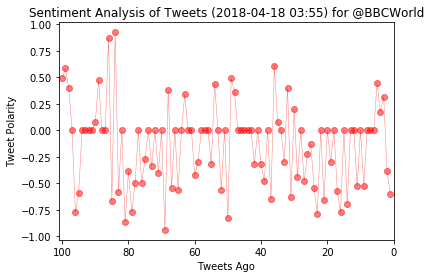

In [195]:
BBCNews_df = clean_news_tweet[clean_news_tweet.News.isin(["@BBCWorld"])]
BBCNews_df

#Create plot
x_vals_BBCNews_df = BBCNews_df["Tweets Ago"];
y_vals_BBCNews_df = BBCNews_df["Compound"];
plt.plot(x_vals_BBCNews_df, y_vals_BBCNews_df, marker="o", linewidth=0.5, alpha=0.5, color="red");


#Incorporate other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_accounts[0]}")
plt.xlim([x_vals_BBCNews_df.max()+1,x_vals_BBCNews_df.min()-1])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()
plt.savefig('BBCWorld Sentiment.png')

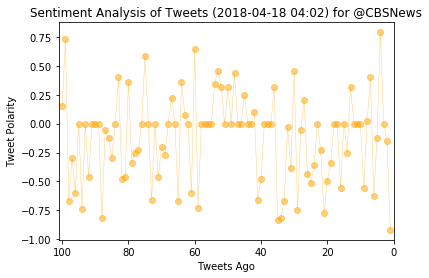

AttributeError: 'list' object has no attribute 'savefig'

In [200]:
CBSNews_df = clean_news_tweet[clean_news_tweet.News.isin(["@CBSNews"])]
CBSNews_df

#Create plot
x_vals_CBSNews_df = CBSNews_df["Tweets Ago"];
y_vals_CBSNews_df = CBSNews_df["Compound"];
plt.plot(x_vals_CBSNews_df, y_vals_CBSNews_df, marker="o", linewidth=0.5, alpha=0.5, color="orange");


#Incorporate other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_accounts[1]}")
plt.xlim([x_vals_CBSNews_df.max()+1,x_vals_CBSNews_df.min()-1])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()
plt.savefig('CBSNews Sentiment.png', dpi=100)

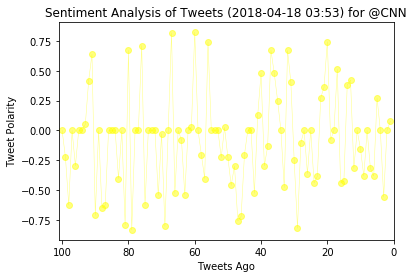

In [189]:
CNN_df = clean_news_tweet[clean_news_tweet.News.isin(["@CNN"])]
CNN_df

#Create plot
x_vals_CNN_df = CNN_df["Tweets Ago"];
y_vals_CNN_df = CNN_df["Compound"];
plt.plot(x_vals_CNN_df, y_vals_CNN_df, marker="o", linewidth=0.5, alpha=0.5, color="yellow");


#Incorporate other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_accounts[2]}")
plt.xlim([x_vals_CNN_df.max()+1,x_vals_CNN_df.min()-1])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()
plt.savefig('CNN Sentiment.png')

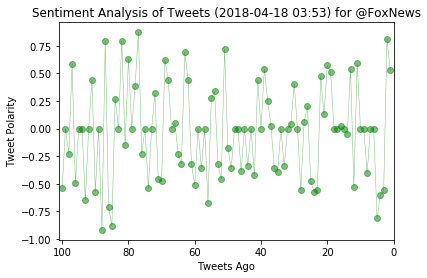

In [190]:
FoxNews_df = clean_news_tweet[clean_news_tweet.News.isin(["@FoxNews"])]
FoxNews_df

#Create plot
x_vals_FoxNews_df = FoxNews_df["Tweets Ago"];
y_vals_FoxNews_df = FoxNews_df["Compound"];
plt.plot(x_vals_FoxNews_df, y_vals_FoxNews_df, marker="o", linewidth=0.5, alpha=0.5, color="green");


#Incorporate other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_accounts[3]}")
plt.xlim([x_vals_FoxNews_df.max()+1,x_vals_FoxNews_df.min()-1])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()
plt.savefig('FoxNews Sentiment.png')

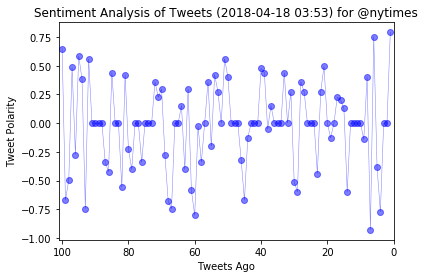

In [191]:
nytimes_df = clean_news_tweet[clean_news_tweet.News.isin(["@nytimes"])]
nytimes_df

#Create plot
x_vals_nytimes_df = nytimes_df["Tweets Ago"];
y_vals_nytimes_df = nytimes_df["Compound"];
plt.plot(x_vals_nytimes_df, y_vals_nytimes_df, marker="o", linewidth=0.5, alpha=0.5, color="blue");


#Incorporate other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_accounts[4]}")
plt.xlim([x_vals_nytimes_df.max()+1,x_vals_nytimes_df.min()-1])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()
plt.savefig('nytimes.png')

In [192]:
avg_news = pd.DataFrame(avg_results_list).set_index("News").round(3)
clean_avg_news = avg_news.reset_index().rename_axis(None, axis=1)
clean_avg_news

,News,Compound
0,@BBCWorld,-0.162
1,@CBSNews,-0.119
2,@CNN,-0.071
3,@FoxNews,-0.023
4,@nytimes,-0.010


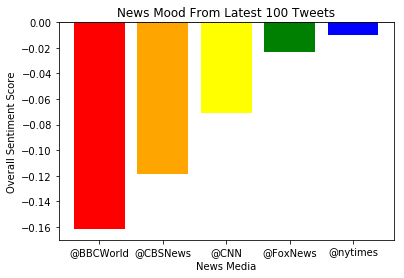

In [193]:
colors = ['red', 'orange', 'yellow', 'green', 'blue']
news_mood = plt.bar(clean_avg_news["News"], clean_avg_news["Compound"], color=colors)
plt.title("News Mood From Latest 100 Tweets")
plt.ylabel("Overall Sentiment Score")
plt.xlabel("News Media")
plt.axhline(y=0, color='black', alpha=0.5)
news_mood
plt.savefig('News Mood Bar Graph.png')

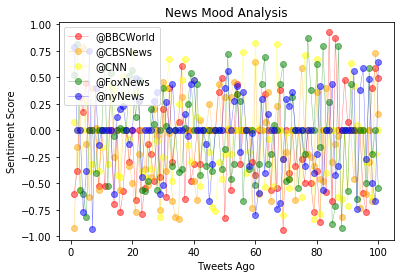

In [194]:
plt.plot(x_vals_BBCNews_df, y_vals_BBCNews_df, marker="o", linewidth=0.5, alpha=0.5, color="red", label="@BBCWorld");
plt.plot(x_vals_CBSNews_df, y_vals_CBSNews_df, marker="o", linewidth=0.5, alpha=0.5, color="orange", label="@CBSNews");
plt.plot(x_vals_CNN_df, y_vals_CNN_df, marker="o", linewidth=0.5, alpha=0.5, color="yellow", label="@CNN");
plt.plot(x_vals_FoxNews_df, y_vals_FoxNews_df, marker="o", linewidth=0.5, alpha=0.5, color="green", label="@FoxNews");
plt.plot(x_vals_nytimes_df, y_vals_nytimes_df, marker="o", linewidth=0.5, alpha=0.5, color="blue", label="@nyNews");
plt.legend(loc="best")
plt.title("News Mood Analysis")
plt.ylabel("Sentiment Score")
plt.xlabel("Tweets Ago")
plt.savefig('All News Organization Sentiments.png')